# Data Augmentation

In [2]:
import pickle
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util

from sklearn.utils import shuffle
from collections import defaultdict
import time
import random
import scipy.ndimage

from skimage import exposure

RESIZED_IMG_SIZE = 32


In [3]:
# Load pickled data
import pickle
import numpy as np
import pandas as pd

# TODO: Fill this in based on where you saved the training and testing data

training_file = './Data/train.p'
validation_file= './Data/valid.p'
testing_file = './Data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Rescale Intensities

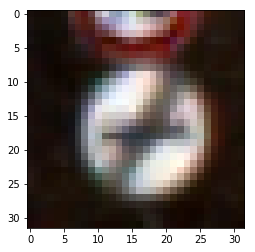

In [4]:
v_min, v_max = np.percentile(X_train[0], (0.2, 99.8))
better_contrast = exposure.rescale_intensity(X_train[0], in_range=(v_min, v_max))
plt.imshow(better_contrast)

In [5]:

def augment(image_array: ndarray, i):
    
    if(i ==1):
    # pick a random degree of rotation between 30% on the left and 30% on the right
        random_degree = random.uniform(-30, 30)
        return sk.transform.rotate(image_array, random_degree)
    
    elif(i ==2):
        # add random noise to the image
        return sk.util.random_noise(image_array)
    
    elif(i==3):
        # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
        return image_array[:, ::-1]
    elif(i==4):
        
        v_min, v_max = np.percentile(image_array, (0.2, 99.8))
        better_contrast = exposure.rescale_intensity(image_array, in_range=(v_min, v_max))

        return better_contrast
    
    elif(i==5):
        
        vertical_flip = image_array[::-1, :] # vertical flip
        return vertical_flip
    
    elif(i==6):
        
        blured_image = ndimage.uniform_filter(image_array, size=(11, 11, 1)) #blur image
        return blured_image




        

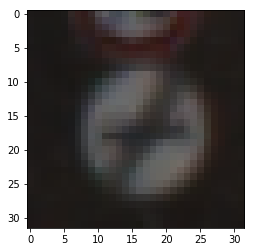

In [6]:
im = X_train[0]
plt.imshow(im)  #original image

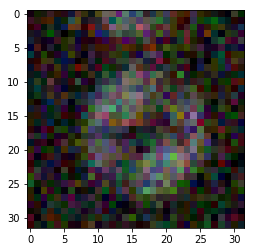

In [7]:
plt.imshow(augment(im,2))  # image after augmentation techniques

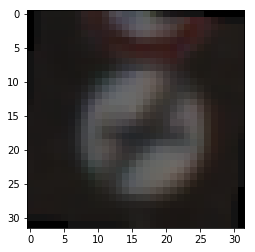

In [8]:
plt.imshow(augment(im,1))  # image after augmentation techniques

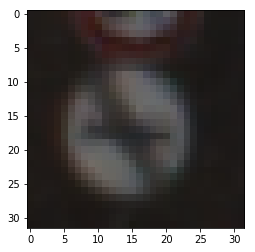

In [9]:
plt.imshow(augment(im,3))  # image after augmentation techniques

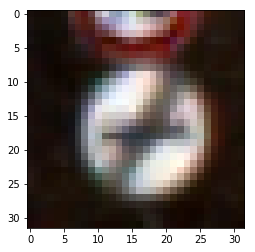

In [10]:
plt.imshow(augment(im,4))  # image after augmentation techniques

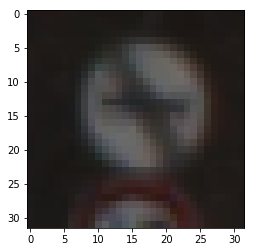

In [11]:
plt.imshow(augment(im,5))  # image after augmentation techniques

In [14]:
avg= 34799/43.0 # average distribution of data over all 43 classes 


In [15]:
expanded_data=[]
expanded_data_y=[]

1


In [18]:

### may be final function

for k in range(len(set(y_train))):
    #k =key 3 #y-VALUE
    index= np.where(y_train == k)
    x_temp = X_train[index]
    value = x_temp.shape[0]
    if (value < 809):
        #augment data and merge augmented data into .p
        diff = 809 - value
        # 5 augmet functions
        
        for v in range(0,diff):
            ran = random.randint(0,value-1)
            ran_aug = random.randint(1,6)
            img = augment(x_temp[ran],ran_aug)
            #img = x_temp[0]
            #expanded_data = np.concatenate((expanded_data,img), axis = 0)
            #expanded_data_y = np.concatenate((expanded_data_y,k), axis = 0)
            expanded_data.append(img)
            expanded_data_y.append(k)
        
        
        


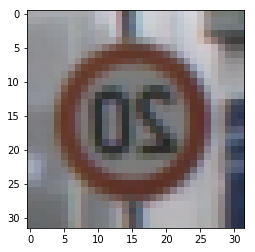

In [20]:
plt.imshow(expanded_data[23])

In [21]:
expanded_data_new = np.array(np.zeros((1, 32,32,3))) # convert list to np array type
expanded_data_y_new = np.array(np.zeros((46714,1)))

In [22]:
expanded_data = np.array(expanded_data)
expanded_data_y = np.array(expanded_data_y)

In [23]:
expanded_data_new = np.concatenate((expanded_data,X_train), axis = 0) # merge original training data to augmented data


In [24]:
expanded_data_y_new = np.concatenate((expanded_data_y,y_train), axis = 0)


In [28]:
expanded_data_new = np.concatenate((expanded_data_new,X_valid), axis = 0) # merge original validation data to augmented data


In [29]:
expanded_data_y_new = np.concatenate((expanded_data_y_new,y_valid), axis = 0)


In [30]:
expanded_data_new.shape

(51273, 32, 32, 3)

In [31]:
expanded_data_y_new.shape

(51273,)

# Train/Valid Split for the expanded dataset

In [32]:
from sklearn.model_selection import train_test_split
expanded_data_new_train, expanded_data_new_valid, expanded_data_y_new_train, expanded_data_y_new_valid = train_test_split(expanded_data_new, expanded_data_y_new, test_size=0.2, random_state=0)

In [33]:
did_train = {'features': expanded_data_new_train,'labels':expanded_data_y_new_train}

In [34]:
pickle_out = open("train_new.p","wb") # dump training data
pickle.dump(did_train,pickle_out)
pickle_out.close()

In [35]:
did_valid = {'features': expanded_data_new_valid,'labels':expanded_data_y_new_valid}

In [36]:
pickle_out = open("valid_new.p","wb") # dump validation data
pickle.dump(did_valid,pickle_out)
pickle_out.close()